
# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

### Importing dataset

In [2]:
data = pd.read_excel("PHD 9 Oct 2024.xlsx")

In [3]:
data.head()

Name  COMPLETE  Stroke volume           PRN   age  gender  \
0        LATIF MUNIR       0.0       0.305118  2.400000e+11  59.0     1.0   
1    Arun Chichalkar       NaN       0.692569  2.400000e+11  69.0     1.0   
2  shinde genu bappu       1.0       0.711941  2.400001e+11  58.0     1.0   
3   Jadhav Pandurang       1.0       0.721628  2.400000e+11  50.0     1.0   
4  Pawar Uttam April       0.0       0.774902  2.400001e+11  67.0     1.0   

         date of onset time of onset    date of admission  \
0  2024-04-26 00:00:00         0.875  2024-04-26 00:00:00   
1  2024-05-06 00:00:00         0.875  2024-05-07 00:00:00   
2  2024-07-14 00:00:00      0.416667  2024-07-14 00:00:00   
3  2024-04-03 00:00:00      0.083333  2024-04-03 00:00:00   
4  2024-04-09 00:00:00          0.25  2024-04-11 00:00:00   

     date of discharge  ...  Lt Supraclinoid ICA  Lt Proximal M1 MCA  \
0  2024-04-27 00:00:00  ...                  2.0                 2.0   
1  2024-05-08 00:00:00  ...                  NaN                 NaN   
2             00:00:00  ...                  2.0                 2.0   
3  2024-04-03 00:00:00  ...                  2.0                 2.0   
4             00:00:00  ...                  NaN                 NaN   

   Lt Distal M1 MCA  Lt M2MCA rear  Lt M2 MCA forward  Lt A1 ACA  \
0               2.0            1.0                1.0        1.0   
1               NaN            NaN                NaN        NaN   
2               2.0            1.0                1.0        1.0   
3               2.0            1.0                1.0        1.0   
4               NaN            NaN                NaN        NaN   

   clot burden score  Lt ICA origin  Rt ICA origin  CCA  
0               19.0            1.0              1  NaN  
1                NaN            NaN            NaN  NaN  
2               20.0            1.0              1  NaN  
3               20.0            1.0              1  NaN  
4                NaN            NaN            NaN  NaN  

[5 rows x 72 columns]

In [4]:
data.shape

(205, 72)

In [5]:
data.isna().sum()

Name                   0
COMPLETE               5
Stroke volume          0
PRN                   13
age                    6
                    ... 
Lt A1 ACA             82
clot burden score     82
Lt ICA origin         85
Rt ICA origin         85
CCA                  185
Length: 72, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          205 non-null    object 
 1   COMPLETE                      200 non-null    float64
 2   Stroke volume                 205 non-null    float64
 3   PRN                           192 non-null    float64
 4   age                           199 non-null    float64
 5   gender                        200 non-null    float64
 6   date of onset                 149 non-null    object 
 7   time of onset                 135 non-null    object 
 8   date of admission             198 non-null    object 
 9   date of discharge             171 non-null    object 
 10  cell1                         190 non-null    float64
 11  cell2                         70 non-null     float64
 12  NIHSS                         196 non-null    float64
 13  SHT  

In [7]:
data.nunique()

Name                 203
COMPLETE               2
Stroke volume        201
PRN                  155
age                   59
                    ... 
Lt A1 ACA              2
clot burden score     11
Lt ICA origin          2
Rt ICA origin          3
CCA                   15
Length: 72, dtype: int64

### Dropping unnecesaary Features

In [8]:
data.columns

Index(['Name', 'COMPLETE', 'Stroke volume', 'PRN', 'age', 'gender',
       'date of onset', 'time of onset', 'date of admission',
       'date of discharge', 'cell1', 'cell2', 'NIHSS', 'SHT', 'DM', 'Alcohol',
       'smoking', 'tobacco', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
       'rheumatic heart disease', 'other risk factors', 'haemoglobin', 'PCV',
       'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'MRI', 'HDL Cholesterol',
       'Triglycerides', 'V LDL', 'b 12', 'other investigations',
       'strokevolume', 'MRI Brain', 'CT Angiography', 'Rt', 'CT ASPECTS',
       'TAN', 'MAS', 'MITEFF', 'MCTA', 'V54', 'ecosprine', 'clopidogril',
       'thrombolysis', 'thrombolytic agent', 'anticoagulation',
       'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
       'barthel index', 'Rt infraclinoid ICA', 'Rt Supraclinoid ICA',
       'Rt Proximal M1 MCA', 'Rt Distal M1 MCA', 'Rt M2MCA rear',
       'Rt M2 MCA forward', 'Rt A1 ACA', 'Lt infraclinoid ICA',
       

In [9]:
# important_features = ['Name', 'COMPLETE', 'Stroke volume', 'PRN', 'age', 'gender',
#        'date of onset', 'time of onset', 'date of admission',
#        'date of discharge', 'cell1', 'cell2', 'NIHSS', 'SHT', 'DM', 'Alcohol',
#        'smoking', 'tobacco', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
#        'rheumatic heart disease', 'other risk factors', 'haemoglobin', 'PCV',
#        'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'MRI', 'HDL Cholesterol',
#        'Triglycerides', 'V LDL', 'b 12', 'other investigations',
#        'strokevolume', 'MRI Brain', 'CT Angiography', 'Rt', 'CT ASPECTS',
#        'TAN', 'MAS', 'MITEFF', 'MCTA', 'V54', 'ecosprine', 'clopidogril',
#        'thrombolysis', 'thrombolytic agent', 'anticoagulation',
#        'mechanical thrombectomy', 'decompressive hemicranectomy', 'MRS',
#        'barthel index', 'Rt infraclinoid ICA', 'Rt Supraclinoid ICA',
#        'Rt Proximal M1 MCA', 'Rt Distal M1 MCA', 'Rt M2MCA rear',
#        'Rt M2 MCA forward', 'Rt A1 ACA', 'Lt infraclinoid ICA',
#        'Lt Supraclinoid ICA', 'Lt Proximal M1 MCA', 'Lt Distal M1 MCA',
#        'Lt M2MCA rear', 'Lt M2 MCA forward', 'Lt A1 ACA', 'clot burden score',
#        'Lt ICA origin', 'Rt ICA origin', 'CCA']

In [10]:
# important_features = ['Name', 'Stroke volume', 'age', 'gender', 'NIHSS', 'SHT', 'DM', 'Alcohol', 'smoking', 'tobacco',
#       'dyslipidaemia', 'atrial fibrillation', 'IHD',
#       'rheumatic heart disease', 'haemoglobin', 'Homocystiene', 'CT ASPECTS', 'MRS',
#        'barthel index']

In [11]:
important_features = ['Name', 'Stroke volume', 'age', 'gender','NIHSS', 'SHT', 'DM', 'Alcohol',
       'smoking', 'tobacco', 'dyslipidaemia', 'atrial fibrillation', 'IHD',
       'rheumatic heart disease', 'haemoglobin', 'PCV',
       'MCV', 'Homocystiene', 'HbA1C', 'Cholesterol', 'MRI', 'HDL Cholesterol',
       'Triglycerides', 'V LDL', 'b 12', 'CT ASPECTS',
       'TAN', 'MAS', 'MITEFF', 'MCTA', 'MRS',
       'barthel index', 'Rt infraclinoid ICA', 'Rt Supraclinoid ICA',
       'Rt Proximal M1 MCA', 'Rt Distal M1 MCA', 'Rt M2MCA rear',
       'Rt M2 MCA forward', 'Rt A1 ACA', 'Lt infraclinoid ICA',
       'Lt Supraclinoid ICA', 'Lt Proximal M1 MCA', 'Lt Distal M1 MCA',
       'Lt M2MCA rear', 'Lt M2 MCA forward', 'Lt A1 ACA', 'clot burden score',
       'Lt ICA origin', 'Rt ICA origin']

In [12]:
data = data[important_features]

In [13]:
data.head()

Name  Stroke volume   age  gender  NIHSS  SHT   DM  Alcohol  \
0        LATIF MUNIR       0.305118  59.0     1.0    0.0  1.0  2.0      2.0   
1    Arun Chichalkar       0.692569  69.0     1.0    1.0  2.0  1.0      2.0   
2  shinde genu bappu       0.711941  58.0     1.0    2.0  1.0  2.0      2.0   
3   Jadhav Pandurang       0.721628  50.0     1.0    3.0  2.0  1.0      1.0   
4  Pawar Uttam April       0.774902  67.0     1.0    4.0  1.0  1.0      2.0   

   smoking  tobacco  ...  Lt infraclinoid ICA  Lt Supraclinoid ICA  \
0      2.0      2.0  ...                  1.0                  2.0   
1      2.0      1.0  ...                  NaN                  NaN   
2      2.0      1.0  ...                  1.0                  2.0   
3      1.0      2.0  ...                  1.0                  2.0   
4      2.0      2.0  ...                  NaN                  NaN   

   Lt Proximal M1 MCA  Lt Distal M1 MCA  Lt M2MCA rear  Lt M2 MCA forward  \
0                 2.0               2.0            1.0                1.0   
1                 NaN               NaN            NaN                NaN   
2                 2.0               2.0            1.0                1.0   
3                 2.0               2.0            1.0                1.0   
4                 NaN               NaN            NaN                NaN   

   Lt A1 ACA  clot burden score  Lt ICA origin  Rt ICA origin  
0        1.0               19.0            1.0              1  
1        NaN                NaN            NaN            NaN  
2        1.0               20.0            1.0              1  
3        1.0               20.0            1.0              1  
4        NaN                NaN            NaN            NaN  

[5 rows x 49 columns]

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     205 non-null    object 
 1   Stroke volume            205 non-null    float64
 2   age                      199 non-null    float64
 3   gender                   200 non-null    float64
 4   NIHSS                    196 non-null    float64
 5   SHT                      197 non-null    float64
 6   DM                       197 non-null    float64
 7   Alcohol                  197 non-null    float64
 8   smoking                  197 non-null    float64
 9   tobacco                  197 non-null    float64
 10  dyslipidaemia            197 non-null    float64
 11  atrial fibrillation      197 non-null    float64
 12  IHD                      181 non-null    float64
 13  rheumatic heart disease  197 non-null    float64
 14  haemoglobin              1

- Storke Volume is Object , we need all the stroke volume as float

In [15]:
for index, value in data['Stroke volume'].items():
    # Check if each value can be converted to a float
    try:
        float(value)
    except ValueError:
        # If not a float, drop the row
        data.drop(index, inplace=True)

In [16]:
data.loc[:,'Stroke volume'] = pd.to_numeric(data['Stroke volume'], errors='coerce')

## Dealing with NULL values

- Checking Null Stroke Volume

In [17]:
data["Stroke volume"].isna().sum()

0

- Checking NULL MRS value

In [21]:
data['MRS'].isna().sum()

0

In [22]:
data.shape

(205, 49)

### Dropping NULL MRS and NULL Stroke Volume


In [23]:
data.dropna(subset=['MRS'], inplace=True)

In [24]:
data.shape

(205, 49)

In [25]:
data['Stroke volume'].isna().sum()

0

In [26]:
data.dropna(subset=['Stroke volume'],inplace =True)

In [27]:
data.drop(columns=["Name"], inplace=True)

In [28]:
data.head()

Stroke volume   age  gender  NIHSS  SHT   DM  Alcohol  smoking  tobacco  \
0       0.305118  59.0     1.0    0.0  1.0  2.0      2.0      2.0      2.0   
1       0.692569  69.0     1.0    1.0  2.0  1.0      2.0      2.0      1.0   
2       0.711941  58.0     1.0    2.0  1.0  2.0      2.0      2.0      1.0   
3       0.721628  50.0     1.0    3.0  2.0  1.0      1.0      1.0      2.0   
4       0.774902  67.0     1.0    4.0  1.0  1.0      2.0      2.0      2.0   

   dyslipidaemia  ...  Lt infraclinoid ICA  Lt Supraclinoid ICA  \
0            2.0  ...                  1.0                  2.0   
1            2.0  ...                  NaN                  NaN   
2            2.0  ...                  1.0                  2.0   
3            2.0  ...                  1.0                  2.0   
4            2.0  ...                  NaN                  NaN   

   Lt Proximal M1 MCA  Lt Distal M1 MCA  Lt M2MCA rear  Lt M2 MCA forward  \
0                 2.0               2.0            1.0                1.0   
1                 NaN               NaN            NaN                NaN   
2                 2.0               2.0            1.0                1.0   
3                 2.0               2.0            1.0                1.0   
4                 NaN               NaN            NaN                NaN   

   Lt A1 ACA  clot burden score  Lt ICA origin  Rt ICA origin  
0        1.0               19.0            1.0              1  
1        NaN                NaN            NaN            NaN  
2        1.0               20.0            1.0              1  
3        1.0               20.0            1.0              1  
4        NaN                NaN            NaN            NaN  

[5 rows x 48 columns]

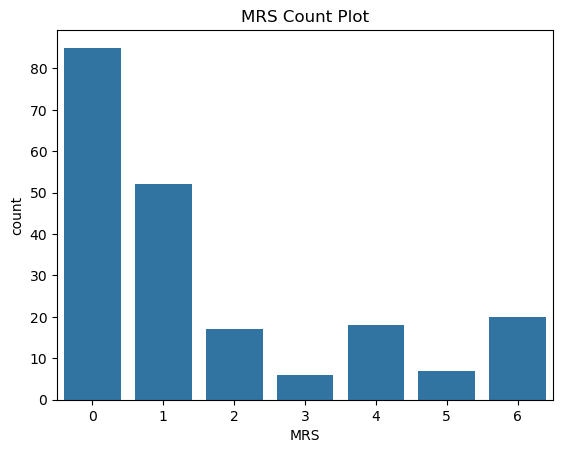

In [29]:
plt.figure()
plt.title('MRS Count Plot')
sns.countplot(data=data, x='MRS')
plt.show()

### Converting MRS to Good MRS and Bad MRS

In [30]:
# 1 = Good, 0 = Bad
data['MRS_Class'] = pd.Series()
for index, value in data['MRS'].items():
    if (value <= 2):
      data.loc[index,'MRS_Class'] = 1
    else:
      data.loc[index,'MRS_Class'] = 0

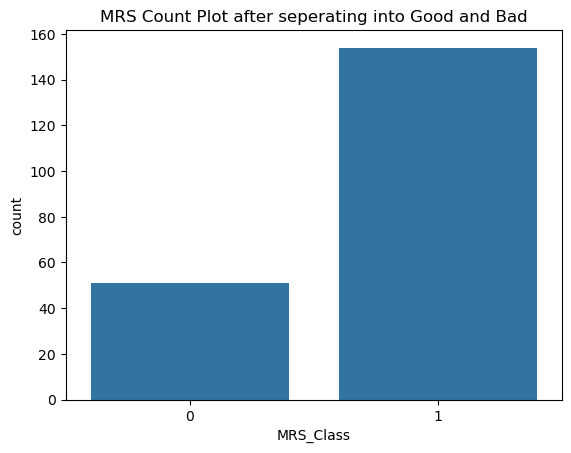

In [31]:
plt.figure()
plt.title('MRS Count Plot after seperating into Good and Bad')
sns.countplot(data=data, x='MRS_Class')
plt.show()

## Ajusting Binary Values

In [32]:
binary_columns = [col for col in data.columns if set(data[col].dropna().unique()) == {1, 2}]

for col in binary_columns:
    data.loc[data[col] == 2, col] = 0

In [33]:
data.reset_index(inplace=True, drop=True)

In [34]:
data.head()

Stroke volume   age  gender  NIHSS  SHT   DM  Alcohol  smoking  tobacco  \
0       0.305118  59.0     1.0    0.0  1.0  0.0      0.0      0.0      0.0   
1       0.692569  69.0     1.0    1.0  0.0  1.0      0.0      0.0      1.0   
2       0.711941  58.0     1.0    2.0  1.0  0.0      0.0      0.0      1.0   
3       0.721628  50.0     1.0    3.0  0.0  1.0      1.0      1.0      0.0   
4       0.774902  67.0     1.0    4.0  1.0  1.0      0.0      0.0      0.0   

   dyslipidaemia  ...  Lt Supraclinoid ICA  Lt Proximal M1 MCA  \
0            0.0  ...                  2.0                 2.0   
1            0.0  ...                  NaN                 NaN   
2            0.0  ...                  2.0                 2.0   
3            0.0  ...                  2.0                 2.0   
4            0.0  ...                  NaN                 NaN   

   Lt Distal M1 MCA  Lt M2MCA rear  Lt M2 MCA forward  Lt A1 ACA  \
0               2.0            1.0                1.0        1.0   
1               NaN            NaN                NaN        NaN   
2               2.0            1.0                1.0        1.0   
3               2.0            1.0                1.0        1.0   
4               NaN            NaN                NaN        NaN   

   clot burden score  Lt ICA origin  Rt ICA origin  MRS_Class  
0               19.0            1.0              1          1  
1                NaN            NaN            NaN          1  
2               20.0            1.0              1          1  
3               20.0            1.0              1          1  
4                NaN            NaN            NaN          1  

[5 rows x 49 columns]

In [35]:
data.to_csv('Cleaned_Data.csv', index=False)
data = pd.read_csv('Cleaned_Data.csv')

## Correlation Matrix

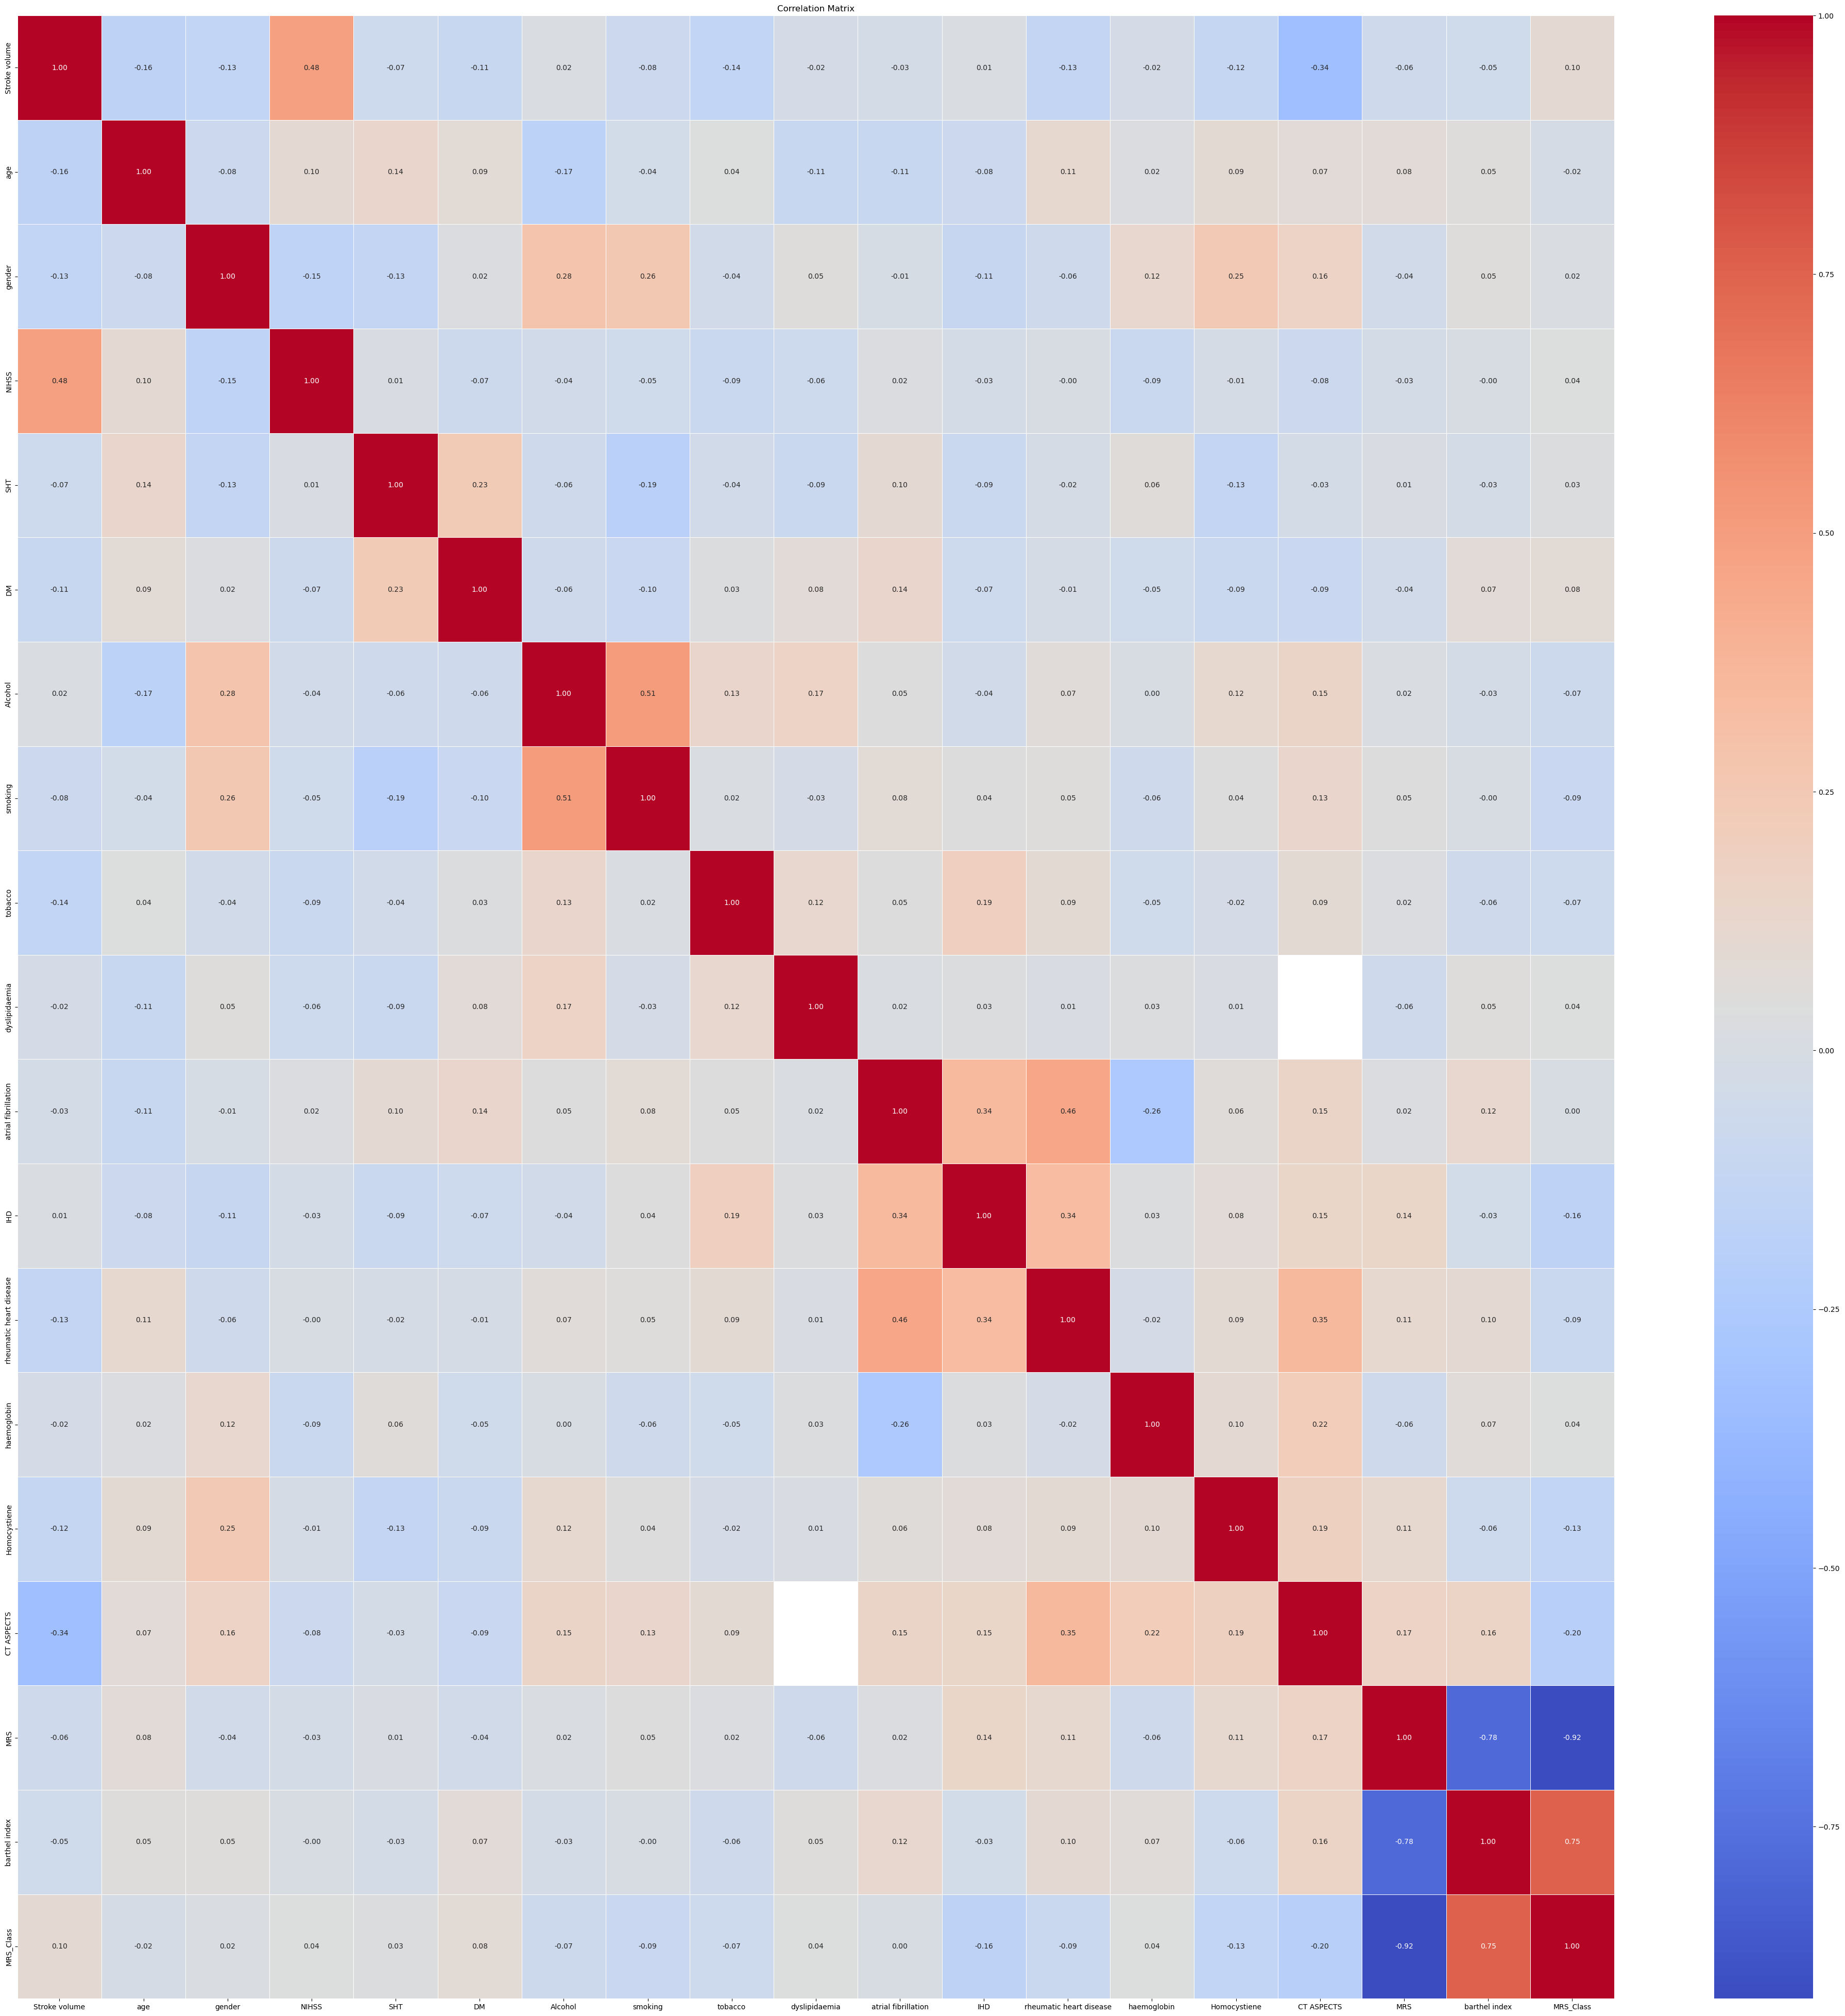

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(50, 50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Feature Extraction

In [33]:
y = data.iloc[:,-1].values
z = data.iloc[:,-2].values
X = data.drop(columns=["MRS","barthel index", "MRS_Class"])
X = X.to_numpy()

In [34]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [35]:
z

array([100., 100., 100., 100.,   0.,   0., 100.,   0., 100.,   0.,  75.,
        95.,  85., 100., 100.,   0.,  90., 100.,  95., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100.,   0., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100.,  95., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100.,   0., 100., 100., 100., 100., 100., 100., 100., 100.,
       100., 100., 100., 100., 100., 100.,   0.,   0.,  90.,  80.,  85.,
        85.,  85.,  85.,  85., 100.,  90.,  90.,  90.,  90.,  80.,  95.,
        90.,  90.,  95.,  95.,  95.,  95.,  95.,  95.,  95., 100., 100.,
       100., 100., 100., 100., 100.,  85., 100., 100., 100., 100.,  85.,
       100., 100.,  85., 100.,  70.,  80., 100., 100., 100., 100., 100.,
       100., 100.,  90., 100.,  80.,  60.,  65.,  65.,  65.,  70.,  80.,
        80.,  85.,  85.,  85.,  90.,  90.,  95.,  9

In [36]:
X

array([[  0.305118,  59.      ,   1.      , ...,  13.6     ,  24.17    ,
          9.      ],
       [  0.692569,  69.      ,   1.      , ...,  14.5     ,  69.89    ,
          9.      ],
       [  0.711941,  58.      ,   1.      , ...,   0.      ,   0.      ,
         10.      ],
       ...,
       [181.032   ,  45.      ,   0.      , ...,   7.7     ,   8.66    ,
          7.      ],
       [249.581   ,  50.      ,   0.      , ...,   8.4     ,   5.88    ,
          4.      ],
       [ 58.7182  ,  75.      ,   0.      , ...,  12.7     ,  14.48    ,
          6.      ]])

## Preprocessing Pipeline

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [38]:
data.isna().sum()

Stroke volume               0
age                         6
gender                      5
NIHSS                       9
SHT                         8
DM                          8
Alcohol                     8
smoking                     8
tobacco                     8
dyslipidaemia               8
atrial fibrillation         8
IHD                        24
rheumatic heart disease     8
haemoglobin                11
Homocystiene               23
CT ASPECTS                 75
MRS                         0
barthel index               1
MRS_Class                   0
dtype: int64

In [39]:
binary_features = [col for col in data.columns if set(data[col].dropna().unique()) == {0, 1}]
binary_features.remove('MRS_Class')
binary_features = [data.columns.get_loc(feature) for feature in binary_features]
binary_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent"))
    ]
)

In [40]:
numeric_features = ['Stroke volume', 'age', 'NIHSS', 'haemoglobin', 'Homocystiene', 'CT ASPECTS']
numeric_features = [data.columns.get_loc(feature) for feature in numeric_features]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", MinMaxScaler())]
)

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("bin", binary_transformer, binary_features),
    ]
)

In [42]:
preprocessing_pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

## Importing Different Models

Top 7 Models:
1. LGMBClassifier
2. GradientBoostingClassifier
3. XGBoostClassifier
4. BaggingClassifier
5. AdaBoostClassifier
6. DecisionTreeClassifier
7. RandomForestClassifier


In [43]:
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import BaggingClassifier
import warnings

## Model Pipeline

In [44]:
pipeline = Pipeline(
    steps = [('preprocessor', preprocessor), ('classifier', DecisionTreeClassifier())]
)

## Cross Validation Pipeline

In [45]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [46]:
# Define parameters for Decision Tree
param1 = {}
param1['classifier__max_depth'] = [3, 5, 10]
param1['classifier__criterion'] = ['gini', 'entropy']
param1['classifier'] = [DecisionTreeClassifier()]

# Define parameters for Random Forest
param2 = {}
param2['classifier__n_estimators'] = [50, 100, 200]
param2['classifier__max_depth'] = [3, 5, 10]
param2['classifier__criterion'] = ['gini', 'entropy']
param2['classifier__bootstrap'] = [True, False]
param2['classifier'] = [RandomForestClassifier()]

# Define parameters for AdaBoost
param3 = {}
param3['classifier__n_estimators'] = [50, 100, 200]
param3['classifier__learning_rate'] = [0.1, 0.01, 0.001]
param3['classifier__estimator'] = [DecisionTreeClassifier(criterion='gini', max_depth = 5), DecisionTreeClassifier(criterion='gini',max_depth=3)]
param3['classifier'] = [AdaBoostClassifier()]

# Define parameters for Gradient Boosting
param4 = {}
param4['classifier__n_estimators'] = [50, 100, 200]
param4['classifier__learning_rate'] = [0.1, 0.01, 0.001]
param4['classifier__max_depth'] = [3, 5, 10]
param4['classifier'] = [GradientBoostingClassifier()]

# Define parameters for XGBClassifier
param5 = {}
param5['classifier__n_estimators'] = [50, 100, 200]
param5['classifier__max_depth'] = [3, 5, 10]
param5['classifier__learning_rate'] = [0.1, 0.01, 0.001]
param5['classifier'] = [XGBClassifier()]

# Define parameters for LGBMClassifier
param6 = {}
param6['classifier__n_estimators'] = [50, 100, 200]
param6['classifier__max_depth'] = [3, 5, 10]
param6['classifier__learning_rate'] = [0.1, 0.01, 0.001]
param6['classifier'] = [LGBMClassifier()]

# Define parameters for Bagging Classifier (Example with Decision Tree)
param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100]
param7['classifier__estimator'] = [DecisionTreeClassifier(criterion='gini', max_depth = 5), LogisticRegression(C = 0.1, penalty='l1', solver='liblinear')]
param7['classifier'] = [BaggingClassifier()]

In [47]:
params = [param1, param2, param3, param4, param5, param6, param7]

In [48]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [50]:
grid = GridSearchCV(pipeline, params, cv=cv, scoring=['accuracy', 'f1', 'recall', 'roc_auc', 'jaccard', 'balanced_accuracy'], refit=False, verbose=2).fit(X, y)

Fitting 10 folds for each of 147 candidates, totalling 1470 fits
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time=   0.0s
[CV] END classifier=DecisionTreeClassifier(), classifier__criterion=gini, classifier__max_depth=3; total time

c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.3s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_d

c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.

[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=5), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=50; total time=   0.0s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=100; total time=   0.1s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s


c:\Users\Aditya\.conda\envs\stroke_prediction\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier=AdaBoostClassifier(), classifier__estimator=DecisionTreeClassifier(max_depth=3), classifier__learning_rate=0.001, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(), classifier__learning_rate=0.1, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier=GradientBoostingClassifier(

In [57]:
print(grid.best_params_)

{'classifier': AdaBoostClassifier(), 'classifier__estimator': DecisionTreeClassifier(max_depth=3), 'classifier__learning_rate': 0.01, 'classifier__n_estimators': 200}


In [51]:
print(grid.best_score_)

0.9311904761904761


In [52]:
means = np.round_(grid.cv_results_['mean_test_score'], 6)
params_summary = grid.cv_results_['params']

In [53]:
df = pd.DataFrame(list(zip(means, params_summary)), columns=['Mean Score', 'Parmeters'])
df = df.sort_values(by = 'Mean Score', ascending=False)

In [54]:
from datetime import datetime
current_datetime = datetime.now().strftime("%d-%m-%Y-%H-%M-%S")
result_filename = 'Results-'+ current_datetime +'.csv'
df.to_csv(result_filename, index=False)

In [55]:
# CART, PERT, Random Forest Bagging & Boosting(Entropy or Gini indix), SVM(All Kernels), K_Folds

In [56]:
#logistic regression, Naive Bayes